In [21]:
import pickle
import numpy as np
import matplotlib
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import os
import math
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors


name = '2024_02_17_20_19_05_lp'
env_name = 'myoLegReachFixed-v2'
steps = 1000
pkl_path = './output/PKL/' + env_name + '/'
ep = 100


def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

image_path = './image/' + env_name + '/' + name
os.makedirs(image_path, exist_ok=True)

bins = [60, 70, 80, 90]

In [22]:
AP_pert = []
AP_pert_1, ML_pert_1= [], []#this is only used for the scatter stand/fall plot
ML_pert = []
stand = []
fall = []
pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP= [], [], [], []
pert_1_ML, pert_2_ML, pert_3_ML, pert_4_ML = [], [], [], []
for i in range(ep):
    file_path = pkl_path + name+f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if 0 <= data['modelInfo']['perturbationMagnitude'] <= 10: 
        print(data['modelInfo']['perturbationMagnitude'])
    if height > 0.5:
        stand.append(data.copy())
    else:
        fall.append(data.copy())
    
    if data['modelInfo']['perturbationDirection'] == 1:
        AP_pert_1.append(data)
    else:
        ML_pert_1.append(data)

Text(0.5, 0.98, 'COM Velocity change in Standing Case (cm/s)')

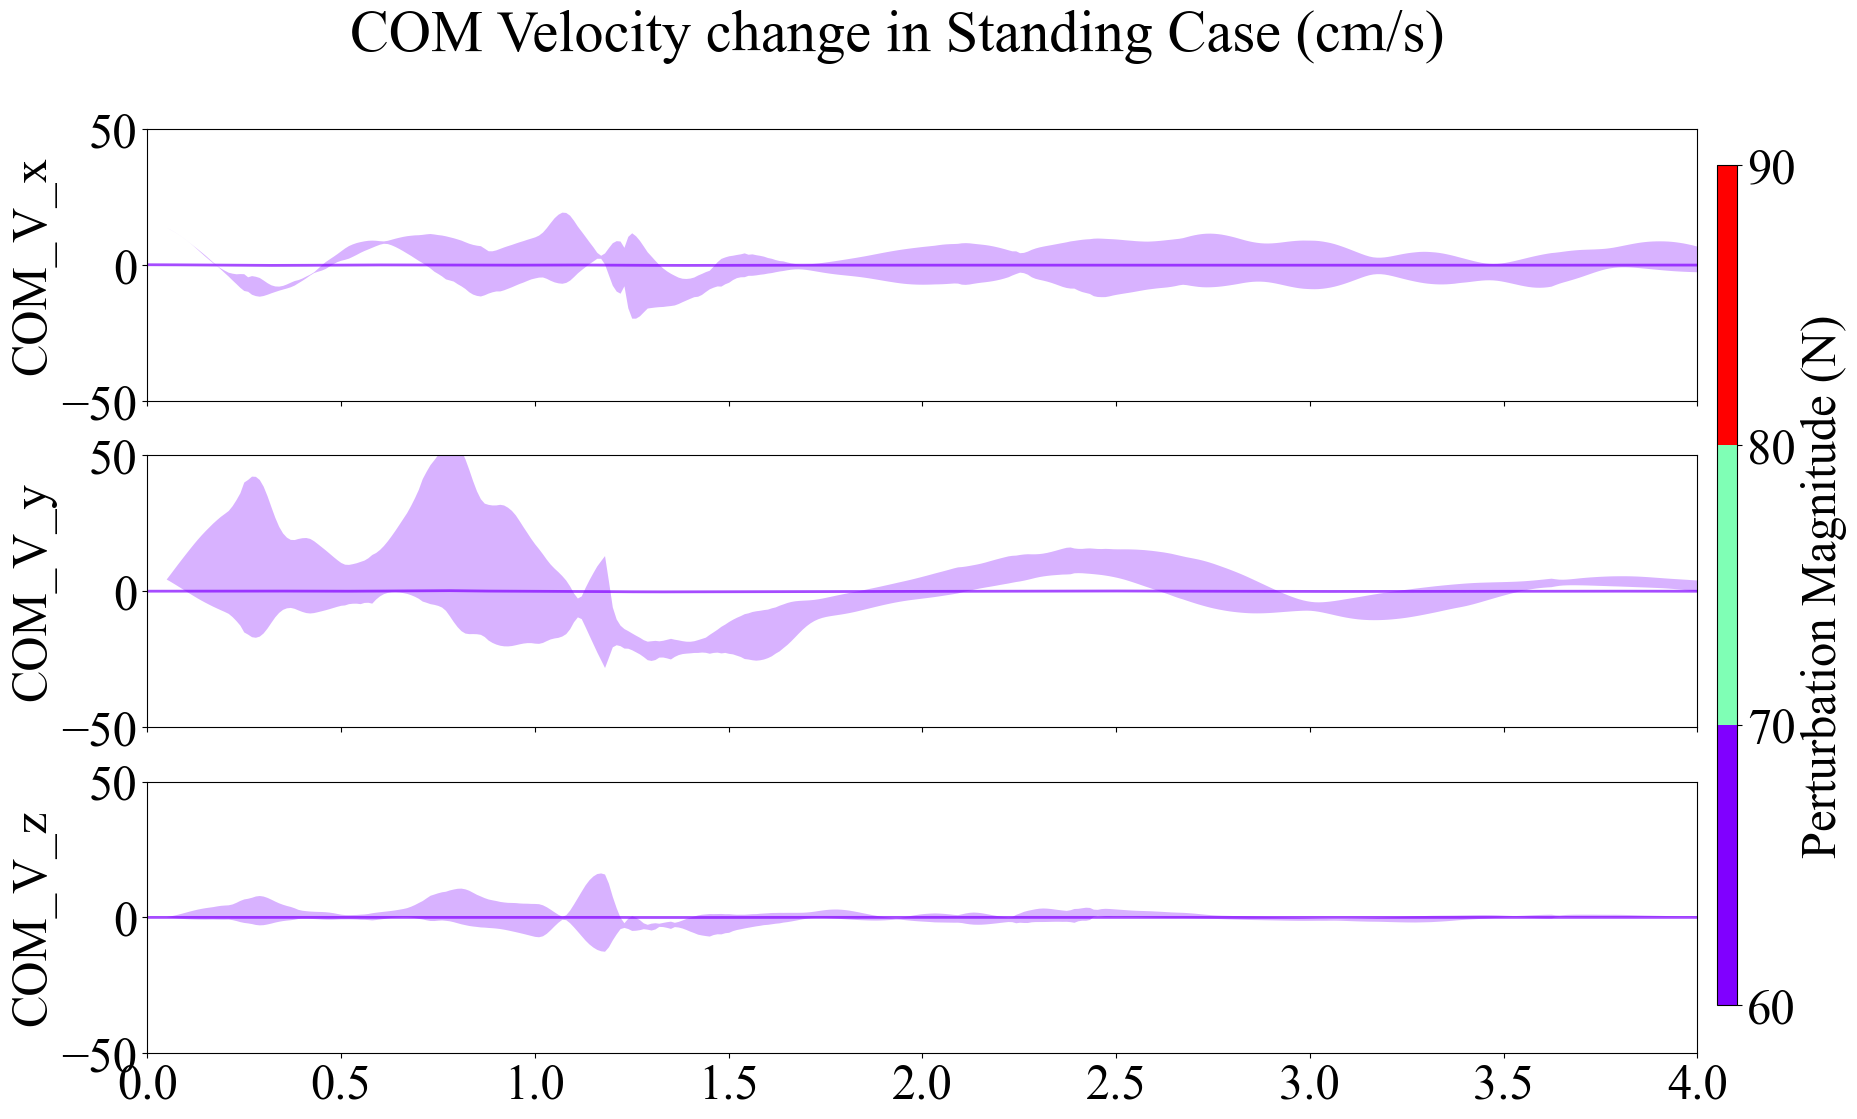

In [23]:
for data in stand:
    if data['modelInfo']['perturbationDirection'] == 1:
        AP_pert.append(data)
        if bins[0] <= data['modelInfo']['perturbationMagnitude'] <= bins[1]:
            pert_1_AP.append(data)
        elif bins[1] <= data['modelInfo']['perturbationMagnitude'] <= bins[2]:
            pert_2_AP.append(data)
        elif bins[2] <= data['modelInfo']['perturbationMagnitude'] <= bins[3]:
            pert_3_AP.append(data)
        elif bins[3] <= data['modelInfo']['perturbationMagnitude'] <= bins[4]:
            pert_4_AP.append(data)
    else:
        ML_pert.append(data)
        if 0 <= data['modelInfo']['perturbationMagnitude'] <= 10:
            pert_1_ML.append(data)
        elif 10 <= data['modelInfo']['perturbationMagnitude'] <= 20:
            pert_2_ML.append(data)
        elif 20 <= data['modelInfo']['perturbationMagnitude'] <= 30:
            pert_3_ML.append(data)
        elif 30 <= data['modelInfo']['perturbationMagnitude'] <= 40:
            pert_4_ML.append(data)

    
pert_AP = [pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP]

plt.rcParams.update({
    "font.family": "Times New Roman",  # specify font family here
    "font.size":35}) 

x_time =np.linspace(0, 9, 900)
colormap = plt.cm.rainbow
norm = mcolors.BoundaryNorm(bins, colormap.N)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 12), sharex=True)
for j in range(len(pert_AP)):
    l1, l2, l3, l4 = [], [], [], []
    l = [l1, l2, l3, l4]
    mean_pert = []
    for k in pert_AP[j]:
        l[j].append(k['bodyInfo']['com_v'])
        mean_pert.append(k["modelInfo"]["perturbationMagnitude"])
    if not l[j]:
        continue
    else:
        mean = np.mean(l[j], axis = 0)*100
        std = np.std(l[j], axis = 0)*100
        upper_x = mean[100:,0] + 2*std[100:,0]
        lower_x = mean[100:,0] - 2*std[100:,0]
        upper_y = mean[100:,1] + 2*std[100:,1]
        lower_y = mean[100:,1] - 2*std[100:,1]
        upper_z = mean[100:,2] + 2*std[100:,2]
        lower_z = mean[100:,2] - 2*std[100:,2]
        ax[0].set_ylabel(f'COM_V_x')
        ax[0].plot(x_time, np.mean(l[j], axis= 0)[100:,0], c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
        ax[0].fill_between(x_time, lower_x.flatten(), upper_x.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)
        ax[1].set_ylabel(f'COM_V_y')
        ax[1].plot(x_time, np.mean(l[j], axis= 0)[100:,1], c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
        ax[1].fill_between(x_time, lower_y.flatten(), upper_y.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)
        ax[2].set_ylabel(f'COM_V_z')
        ax[2].plot(x_time, np.mean(l[j], axis= 0)[100:,2], c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
        ax[2].fill_between(x_time, lower_z.flatten(), upper_z.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)

sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm) 
sm.set_array([]) 

plt.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.15, 0.01, 0.7])
cbar = plt.colorbar(sm, ticks=np.linspace(60, 90, 4), cax=cbar_ax) 
cbar.set_label('Perturbation Magnitude (N)')

plt.setp(ax, xlim=[0, 4], ylim = [-50, 50])
fig.suptitle('COM Velocity change in Standing Case (cm/s)')



In [24]:
pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP = [], [], [], []

for data in fall:
    if data['modelInfo']['perturbationDirection'] == 1:
        AP_pert.append(data)
        if bins[0] <= data['modelInfo']['perturbationMagnitude'] <= bins[1]:
            pert_1_AP.append(data)
        elif bins[1] <= data['modelInfo']['perturbationMagnitude'] <= bins[2]:
            pert_2_AP.append(data)
        elif bins[2] <= data['modelInfo']['perturbationMagnitude'] <= bins[3]:
            pert_3_AP.append(data)
        elif bins[3] <= data['modelInfo']['perturbationMagnitude'] <= bins[4]:
            pert_4_AP.append(data)
    else:
        ML_pert.append(data)
        if 0 <= data['modelInfo']['perturbationMagnitude'] <= 10:
            pert_1_ML.append(data)
        elif 10 <= data['modelInfo']['perturbationMagnitude'] <= 20:
            pert_2_ML.append(data)
        elif 20 <= data['modelInfo']['perturbationMagnitude'] <= 30:
            pert_3_ML.append(data)
        elif 30 <= data['modelInfo']['perturbationMagnitude'] <= 40:
            pert_4_ML.append(data)

    
pert_AP = [pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP]



Text(0.5, 0.98, 'COM Velocity change in Falling Case (cm/s)')

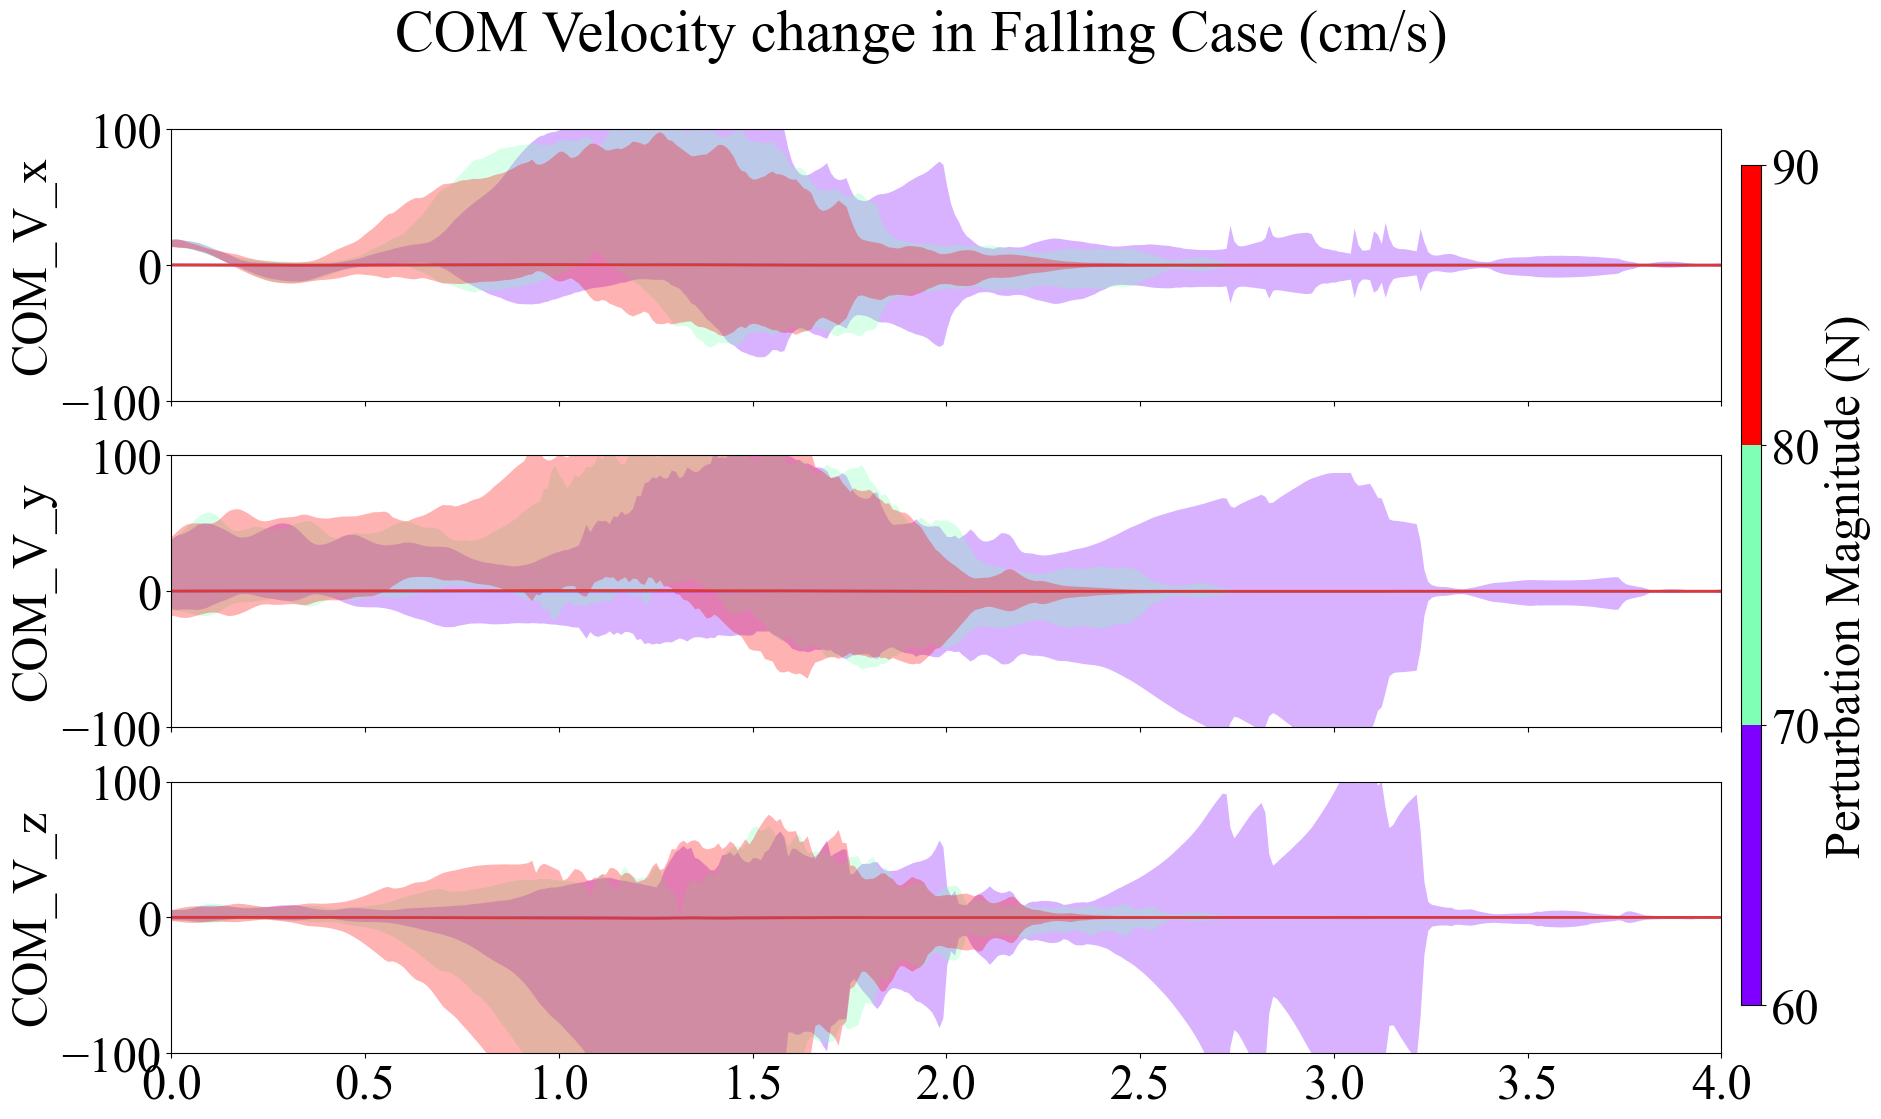

In [25]:
x_time =np.linspace(0, 9, 900)
colormap = plt.cm.rainbow
norm = mcolors.BoundaryNorm(bins, colormap.N)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 12), sharex=True)
for j in range(len(pert_AP)):
    l1, l2, l3, l4 = [], [], [], []
    l = [l1, l2, l3, l4]
    mean_pert = []
    for k in pert_AP[j]:
        l[j].append(k['bodyInfo']['com_v'])
        mean_pert.append(k["modelInfo"]["perturbationMagnitude"])
    if not l[j]:
        continue
    else:
        mean = np.mean(l[j], axis = 0)*100
        std = np.std(l[j], axis = 0)*100
        upper_x = mean[100:,0] + 2*std[100:,0]
        lower_x = mean[100:,0] - 2*std[100:,0]
        upper_y = mean[100:,1] + 2*std[100:,1]
        lower_y = mean[100:,1] - 2*std[100:,1]
        upper_z = mean[100:,2] + 2*std[100:,2]
        lower_z = mean[100:,2] - 2*std[100:,2]
        ax[0].set_ylabel(f'COM_V_x')
        ax[0].plot(x_time, np.mean(l[j], axis= 0)[100:,0], c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
        ax[0].fill_between(x_time, lower_x.flatten(), upper_x.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)
        ax[1].set_ylabel(f'COM_V_y')
        ax[1].plot(x_time, np.mean(l[j], axis= 0)[100:,1], c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
        ax[1].fill_between(x_time, lower_y.flatten(), upper_y.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)
        ax[2].set_ylabel(f'COM_V_z')
        ax[2].plot(x_time, np.mean(l[j], axis= 0)[100:,2], c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
        ax[2].fill_between(x_time, lower_z.flatten(), upper_z.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)

sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm) 
sm.set_array([]) 

plt.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.15, 0.01, 0.7])
cbar = plt.colorbar(sm, ticks=np.linspace(60, 90, 4), cax=cbar_ax) 
cbar.set_label('Perturbation Magnitude (N)')

plt.setp(ax, xlim=[0, 4], ylim = [-100, 100])
fig.suptitle('COM Velocity change in Falling Case (cm/s)')

(0.01, 100)

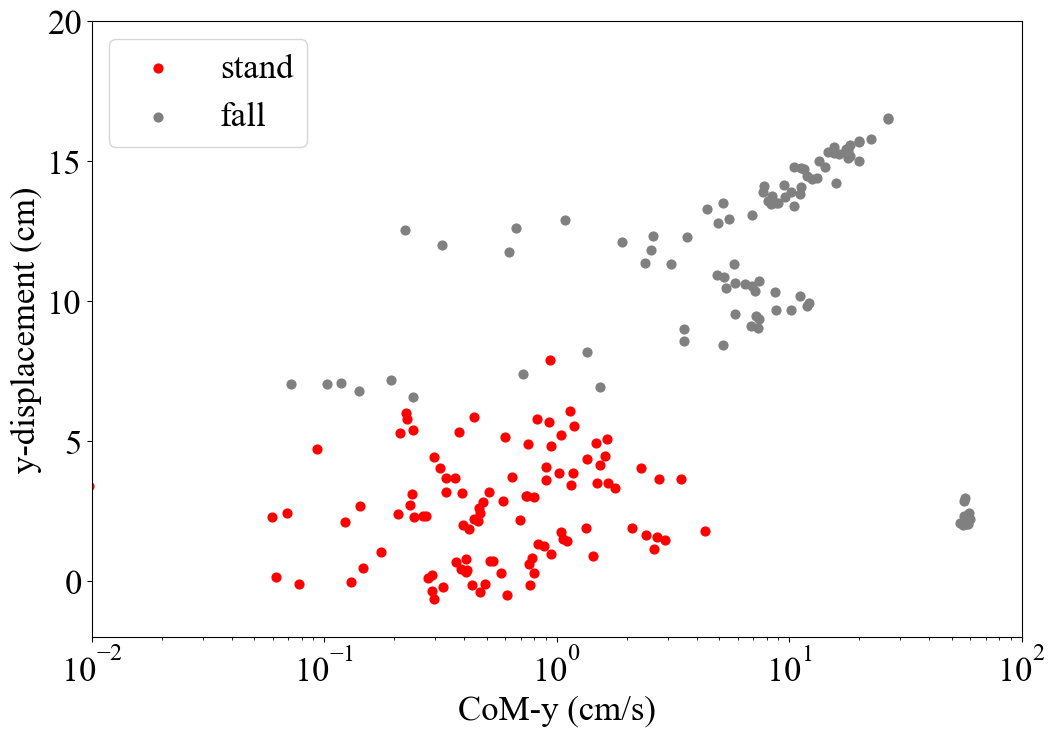

In [36]:
max_y_pos_stand = []
max_y_vel_stand = []
max_y_pos_fall = []
max_y_vel_fall = []
for data in stand:
    y = np.abs([arr[1] for arr in data["bodyInfo"]["com"][100:]])
    max_y_pos_stand.append(max(y)*100 - 8)
    index = np.argmax(y)
    y_v = np.abs([arr[1] for arr in data["bodyInfo"]["com_v"][100:]])
    max_y_vel_stand.append(y_v[index]*100)

for m in fall:
    z = np.abs(np.array([arr[2] for arr in m["bodyInfo"]["com_v"][100:]]))
    max_z = np.argmax(np.abs(z) >= 0.1)
    y = np.abs([arr[1] for arr in m["bodyInfo"]["com"][100:100+max_z]])
    max_y_pos_fall.append(max(y)*100 - 8)
    index = np.argmax(y)
    y_v = np.abs([arr[1] for arr in m["bodyInfo"]["com_v"][100:]])
    max_y_vel_fall.append(y_v[index]*100)


plt.rcParams.update({
    "font.family": "Times New Roman",  # specify font family here
    "font.size":25}) 

    

max_y_pos_stand.extend([1.7573269602156891, 4.38988623668509, 5.072763262342205, 2.7388071791169804, 0.17285997356838578, 1.486537279188063, 4.74226068084276, 2.4326506829761367, 2.0232264208880117, 1.9208051345910704, 1.2828197762688234, 4.479846055590606, -0.48004377268863063, 0.34471507317871364, 3.197825614463012, 0.6953731473709599, 0.9823854727417558, 4.144974028169928, -0.19798903403266266, 2.228915055194726, 1.6518880775815656, 3.6955312943701184, 3.6901579152864024, 5.3284741100072015, 3.0408035434107337, 3.4381595863163756, 5.8815834655818975, -0.3752536084496798, 3.2017379617344446, 5.221403027851922, 1.5827598322873921, 2.880001359601472, -0.6405310218590188, 3.0168094818889255, 0.6074375928660043, 3.8914104617602767, 2.333627976796617, 2.4055555304706733, 0.8138366957079572, -0.029764527916777084, 1.8639488890886629, 4.831871958442784, 0.30676224826764376, 3.644010590758013, 2.1128299035553084, 1.8040182551190167, 2.3357141994594564, 3.7342826294469305, 1.1500031490765554, 5.412389850875758, 3.6486803501573455, 1.3308391122509313, 2.3161345289017294, 4.9495338833145315, 0.2270841478786778, 3.413125995462588, -0.34143020415599246, 0.7185350583540107, 5.813316601394282, 6.03413153247196, 3.119757302533417, 2.432045664460569, 3.173872105220534, 2.2009509322069487, -0.12588399542179474, 3.3391904056474786, 4.046612964260147, 3.6357124425933964, 2.318343014867999, 6.088769852642205, 0.42728073453392135, 5.310595873666987, 3.051584223655613, 0.11635449709082124, 4.920205215153107, 3.5173507808909115, 0.7263139543341754, -0.07812024049449473, 0.4347320838612383, 1.907984765030875, 1.4278726521312102, 4.067055782516984, 2.1565610432937365, 4.096833411011941, 0.3166291930309484, 0.9255479803170132, 3.528102114912949, 2.6190497737098006, 4.450888633668436, 0.4829828911488434, 1.5076126754273194, 3.868449638629718, -0.11027310149232061, 2.6776410415780116, -0.08928316189738261, 2.831854915080081, 0.8498409830902283, 1.0366441857909976])
max_y_vel_stand.extend([1.044115655184606, 1.3481916535185319, 1.639683938398927, 0.2336494977653182, 0.06212328479571486, 2.9216924781289864, 0.0935139012109689, 0.0694766735867324, 0.3975492076898038, 1.3369386610226552, 0.8818748784845839, 1.6196583355806198, 0.6092283562626386, 0.4090764385018543, 0.3349880755935879, 0.3691223227599511, 0.943103463167568, 1.5323138099567593, 0.3253204676809284, 0.4423101693803768, 2.430451125215676, 0.3343744902338577, 0.366254555424423, 0.3808258700705544, 0.7418437501211386, 1.1543919274500565, 0.43960010129849075, 0.4704346078835302, 0.5136483280869589, 1.047773204373529, 2.696743107680975, 0.5894205659619771, 0.2982497897692114, 0.8013152153438039, 0.760824147833209, 1.1768946296463778, 0.2663200465677617, 0.20707502475143824, 0.40579036236001653, 0.1309713382008391, 0.42089275523255093, 0.9487947081741064, 0.7963015337691981, 3.432785648559342, 0.1225626075151788, 4.347708729572351, 0.27423590865390346, 0.6439230515196427, 2.620480013119039, 0.2413744402919315, 2.768941464143274, 0.8287799391654814, 0.24267022488905352, 1.4726224576411964, 0.2921831856133872, 0.00975583449242952, 0.2910936914309215, 0.5338734083282882, 0.22754244528300493, 0.22446540234409232, 0.23983280448466518, 0.46980056523766067, 0.39237051443703913, 0.6942727096520295, 0.7671408353331405, 1.7904046166267562, 2.3165927997659503, 0.8962743611487899, 0.05964609437137586, 1.1418351396210586, 0.411909851881653, 0.21274177126659016, 0.743269832016922, 0.28041026068592534, 0.7566738300086792, 1.659820009413649, 0.5193294344971979, 0.49090981888333596, 0.3875900620046508, 2.1045499389852824, 1.1131643280142145, 0.3148246302078085, 0.4593926968685986, 0.8965842378460573, 0.577330304052233, 1.4361191039272365, 1.4947364250418016, 0.4630090418746306, 0.2964457593066583, 0.1475939282433896, 1.0690484419874893, 1.024474016989091, 0.4307868524728289, 0.14310252364380646, 0.0782354432730762, 0.48304724653046355, 0.7826874088816771, 0.1756565911778743])
max_y_vel_fall.extend([1.5405896130897232, 0.14090406520101914])
max_y_pos_fall.extend([6.954030573936608, 6.790017608327535])

fig, axes = plt.subplots(ncols=1, nrows=1, figsize = (12, 8))
plt.scatter(max_y_vel_stand, max_y_pos_stand, label = 'stand', s= 40, color = 'red')
plt.scatter(max_y_vel_fall, max_y_pos_fall, label = 'fall', s = 40, color = 'grey')
plt.xscale('log')
plt.legend()
plt.ylabel('y-displacement (cm)')
plt.xlabel('CoM-y (cm/s)')
plt.ylim([-2, 20])
plt.xlim([10**(-2), 10**2])